# Basic Operations in Keras

In [57]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

## 1. Zero Padding

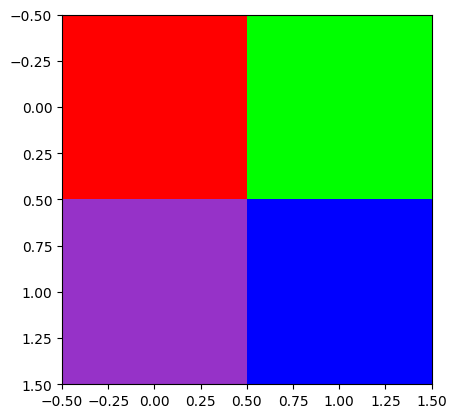

In [58]:
# example gray scale image
x = np.array([[[[0], [1]], [[0], [1]]]])

# show img using matplotlib
#plt.imshow(x[0,:,:,0], cmap='gray')

# image wiht rgb channels with red, green and blue values
x = np.array([[[[255, 0, 0], [0, 255, 0]], [[150, 50, 200], [0, 0, 255]]]])
# show img using matplotlib
plt.imshow(x[0,:,:,:]) # here 0 is the batch size, 0th image, all rows, all columns, all channels

tf.Tensor(
[[[[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [255   0   0]
   [  0 255   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [150  50 200]
   [  0   0 255]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]]], shape=(1, 4, 6, 3), dtype=int32)


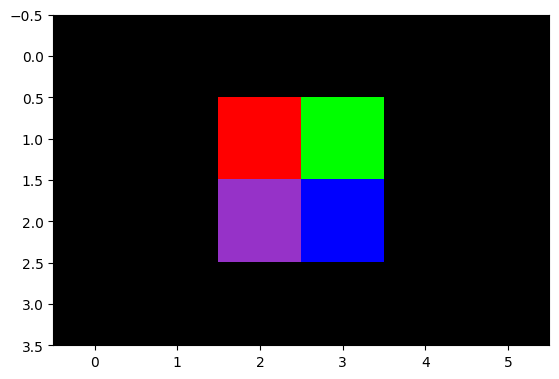

In [59]:
# now padd the image
x_pad = tf.keras.layers.ZeroPadding2D(padding=(1,2))(x) # here (1,3) means pad 1 row on top, 1 row on bottom, 2 columns on left, 2 columns on right
plt.imshow(x_pad[0,:,:,:]) # here 0 is the batch size, 0th image, all rows, all columns, all channels
print(x_pad)

## 2. Convolution

(1, 28, 28, 1)
(1, 26, 26, 1)


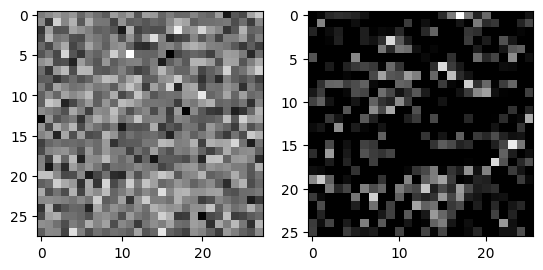

In [60]:
# Conv2D layer
# input shape (batch_size, height, width, channels)
# filters: number of filters
# kernel_size: filter size
# strides: number of pixels to slide the filter
# padding: valid or same
# activation: activation function
# use_bias: use bias or not

#example
input_shape = (1, 28, 28, 1)
x = np.random.randn(1, 28, 28, 1)
print(x.shape)

# create a Conv2D layer
conv = tf.keras.layers.Conv2D(filters=1, 
                              kernel_size=(3,3), 
                              strides=(1,1), 
                              padding='valid', 
                              activation='relu', 
                              use_bias=True, 
                              input_shape=(28, 28, 1))

# here input_shape[1:] means (28, 28, 1) which is the shape of the input image

# apply the Conv2D layer
x_conv = conv(x)
print(x_conv.shape)

# show both images
plt.subplot(1, 2, 1)
plt.imshow(x[0,:,:,0], cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(x_conv[0,:,:,0], cmap='gray')
plt.show()

# NOTE: The convoluted image extracted the darker regions of the image

orig shape: (417, 626, 3)
resized shape: (256, 256, 3)


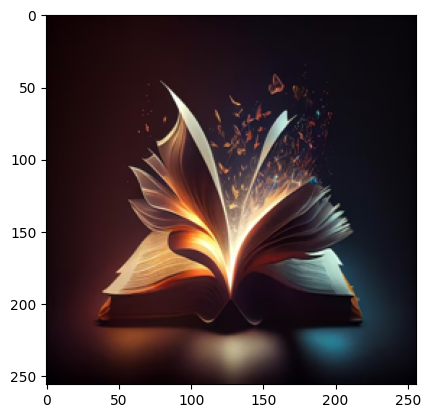

In [61]:
# apply conv to smaple image
# load image
sample_book_img = Image.open('C:\\Users\\kruth\\OneDrive\\Desktop\\DL_basics\\sample_images\\sample_book_img.png')
x_book = np.array(sample_book_img)
print("orig shape:", x_book.shape)

# resize image to 256x256
x_book = np.array(sample_book_img.resize((256, 256)))
print("resized shape:", x_book.shape)

# normalize image
x_book = x_book / 255.0

# show image
plt.imshow(x_book)

conv shape: (1, 127, 127, 1)


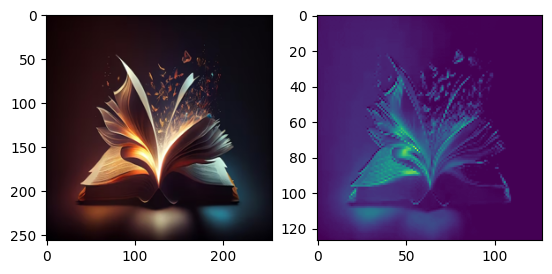

In [62]:
# use conv layer to extract features
x_book = x_book.reshape((1, 256, 256, 3)) # reshape to (batch_size, height, width, channels)
x_book = x_book.astype(np.float32) # convert to float32

# define the conv layer
conv_book = tf.keras.layers.Conv2D(filters=1, 
                                   kernel_size=(3,3), 
                                   strides=(2,2), 
                                   padding='valid', 
                                   activation='relu', 
                                   use_bias=True, 
                                   input_shape=(256, 256, 3))

# filters = 1 means the output will be a single channel image
# kernel_size = (3,3) means the filter size is 3x3
# strides = (2,2) means the filter will slide 2 pixels at a time
# padding = valid means no padding
# activation = relu

# apply the conv layer
x_book_conv = conv_book(x_book)
print("conv shape:", x_book_conv.shape)

# show both images
plt.subplot(1, 2, 1)
plt.imshow(x_book[0,:,:,:])
plt.subplot(1, 2, 2)
plt.imshow(x_book_conv[0,:,:,:])
plt.show()

# MATH: Convolution
# output shape = ((input_shape - kernel_shape + 2*padding) / stride) + 1
# here input_shape = (256, 256, 3), kernel_shape = (3, 3), padding = 0, stride = 2
# output_shape = ((256 - 3 + 2*0) / 2) + 1 = 127.5
# so the output shape is (127, 127, 1)

## 3. batch normalization

In [63]:
# apply batch normalization to axis 3 of the output of the conv layer
# The batch normalization layer is then applied to the output of the convolutional layer (x_book_conv) with x_book_bn = bn(x_book_conv). 
# This normalizes the activations of the convolutional layer, 
# which can help improve the speed, performance, and stability of the neural network.

# define the batch normalization layer
bn = tf.keras.layers.BatchNormalization(axis=3)

# apply the batch normalization layer
x_book_bn = bn(x_book_conv)

# calculate the mean and variance of the output of the batch normalization layer
mean_without_bn = np.mean(x_book_conv)
variance_without_bn = np.var(x_book_conv)
print("mean without bn:", mean_without_bn)
print("variance without bn:", variance_without_bn)
mean_bn = np.mean(x_book_bn)
variance_bn = np.var(x_book_bn)
print("mean with bn:", mean_bn)
print("variance with bn:", variance_bn)

mean without bn: 0.10659879
variance without bn: 0.0196019
mean with bn: 0.10654552
variance with bn: 0.019582318


## 4. Activation Function

tf.Tensor(
[[0.04670998 0.04978572 0.06063116 0.0574985  0.06492397]
 [0.04871281 0.04842695 0.06063116 0.06079396 0.06356519]
 [0.05000545 0.04842695 0.0574985  0.06238913 0.06356519]
 [0.05228294 0.04842695 0.06079396 0.06103036 0.06088318]
 [0.05024185 0.04553007 0.06120647 0.05885695 0.06600548]], shape=(5, 5), dtype=float32)


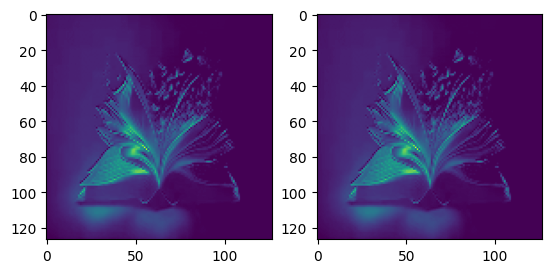

In [64]:
# 1. ReLU Activation

# define the ReLU activation layer
relu = tf.keras.layers.ReLU()

# apply the ReLU activation layer
x_book_relu = relu(x_book_conv)

# print a subset of the output of the ReLU activation layer
print(x_book_relu[0,:5,:5,0])

# show both images
plt.subplot(1, 2, 1)
plt.imshow(x_book_conv[0,:,:,:])
plt.subplot(1, 2, 2)
plt.imshow(x_book_relu[0,:,:,:])
plt.show()

tf.Tensor(
[[0.5116754  0.51244384 0.51515317 0.5143707  0.5162253 ]
 [0.5121758  0.5121044  0.51515317 0.5151938  0.51588595]
 [0.51249874 0.5121044  0.5143707  0.5155922  0.51588595]
 [0.5130678  0.5121044  0.5151938  0.5152528  0.51521605]
 [0.5125578  0.51138055 0.5152968  0.51471    0.51649535]], shape=(5, 5), dtype=float32)


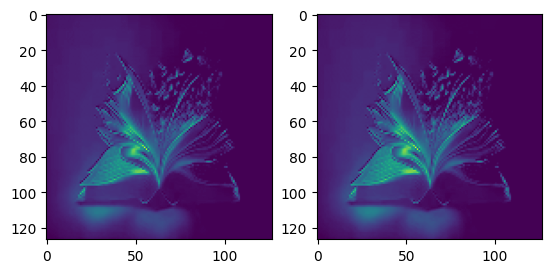

In [65]:
# 2. Sigmoid Activation

# define the Sigmoid activation layer
sigmoid = tf.keras.layers.Activation('sigmoid')

# apply the Sigmoid activation layer
x_book_sigmoid = sigmoid(x_book_conv)

# print a subset of the output of the Sigmoid activation layer
print(x_book_sigmoid[0,:5,:5,0])

# show both images
plt.subplot(1, 2, 1)
plt.imshow(x_book_conv[0,:,:,:])
plt.subplot(1, 2, 2)
plt.imshow(x_book_sigmoid[0,:,:,:])
plt.show()

tf.Tensor(
[[0.04667604 0.04974462 0.06055697 0.05743521 0.0648329 ]
 [0.04867432 0.04838912 0.06055697 0.06071917 0.06347971]
 [0.0499638  0.04838912 0.05743521 0.0623083  0.06347971]
 [0.05223534 0.04838912 0.06071917 0.0609547  0.06080806]
 [0.05019962 0.04549863 0.06113015 0.05878908 0.06590979]], shape=(5, 5), dtype=float32)


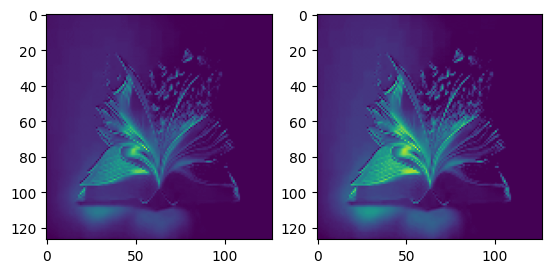

In [66]:
# 3. Tanh Activation

# define the Tanh activation layer
tanh = tf.keras.layers.Activation('tanh')

# apply the Tanh activation layer
x_book_tanh = tanh(x_book_conv)

# print a subset of the output of the Tanh activation layer
print(x_book_tanh[0,:5,:5,0])

# show both images
plt.subplot(1, 2, 1)
plt.imshow(x_book_conv[0,:,:,:])
plt.subplot(1, 2, 2)
plt.imshow(x_book_tanh[0,:,:,:])
plt.show()


## 5. Pooling

conv shape: (1, 127, 127, 1)
pool shape: (1, 63, 63, 1)


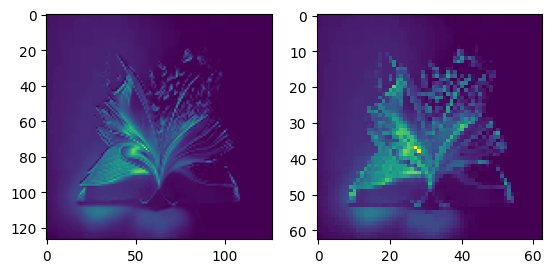

In [67]:
# Max Pooling Layer

# define the max pooling layer
max_pool = tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid')
# pool_size = (2,2) means the pooling window is 2x2
# strides = (2,2) means the pooling window will slide 2 pixels at a time
# padding = valid means no padding

# apply the max pooling layer
x_book_pool = max_pool(x_book_conv)
print("conv shape:", x_book_conv.shape)
print("pool shape:", x_book_pool.shape)


# show both images
plt.subplot(1, 2, 1)
plt.imshow(x_book_conv[0,:,:,:])
plt.subplot(1, 2, 2)
plt.imshow(x_book_pool[0,:,:,:])
plt.show()

# MATH: Max Pooling
# output shape = ((input_shape - pool_shape) / stride) + 1
# here input_shape = (127, 127, 1), pool_shape = (2, 2), stride = 2
# output_shape = ((127 - 2) / 2) + 1 = 63
# so the output shape is (63, 63, 1)

conv shape: (1, 127, 127, 1)
avg pool shape: (1, 63, 63, 1)


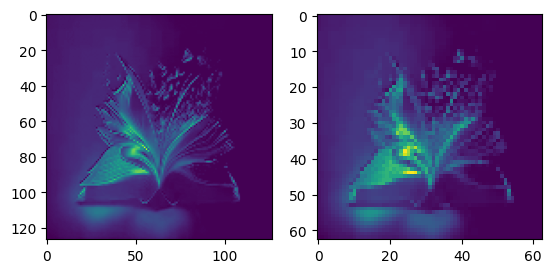

In [68]:
# Average Pooling Layer

# define the average pooling layer
avg_pool = tf.keras.layers.AveragePooling2D(pool_size=(2,2), strides=(2,2), padding='valid')

# apply the average pooling layer
x_book_avg_pool = avg_pool(x_book_conv)
print("conv shape:", x_book_conv.shape)
print("avg pool shape:", x_book_avg_pool.shape)

# show both images
plt.subplot(1, 2, 1)
plt.imshow(x_book_conv[0,:,:,:])
plt.subplot(1, 2, 2)
plt.imshow(x_book_avg_pool[0,:,:,:])
plt.show()

## 6. Flatten

In [69]:
# Flatten Layer is used to convert the 2D output of the convolutional layer to a 1D tensor that can be used as input to a fully connected layer.

# define the flatten layer
flatten = tf.keras.layers.Flatten()

# apply the flatten layer
x_book_flatten = flatten(x_book_conv)
print("conv shape:", x_book_conv.shape)
print("flatten shape:", x_book_flatten.shape)

# MATH: Flatten
# output shape = (batch_size, height * width * channels)
# here input_shape = (1, 127, 127, 1)
# output_shape = (1, 127 * 127 * 1) = (1, 16129)

conv shape: (1, 127, 127, 1)
flatten shape: (1, 16129)


## 7. Dense

In [70]:
# Dense layer is 1 layer of neurons where each neuron is connected to every neuron in the previous layer.

# define the dense layer
dense = tf.keras.layers.Dense(units=64, activation='relu')

# apply the dense layer
x_book_dense = dense(x_book_flatten)
print("flatten shape:", x_book_flatten.shape)
print("dense shape:", x_book_dense.shape)

# MATH: Dense
# output shape = (batch_size, units)
# here units = 64
# output_shape = (1, 64)

# what is outputed from Dense Layer?
# print a subset of the output of the dense layer
print("flatten output:")
print(x_book_flatten[0,:10])
print("dense output:")
print(x_book_dense[0,:10])

# The values in x_book_dense are the outputs of the neurons in the Dense layer. They are calculated by applying the ReLU activation function to the results of the linear operation. The ReLU function outputs the input directly if it is positive, otherwise, it outputs zero. So, the values in x_book_dense are the activated outputs of the Dense layer's neurons.

flatten shape: (1, 16129)
dense shape: (1, 64)
flatten output:
tf.Tensor(
[0.04670998 0.04978572 0.06063116 0.0574985  0.06492397 0.06574129
 0.06286672 0.07447099 0.06929723 0.07272212], shape=(10,), dtype=float32)
dense output:
tf.Tensor(
[0.411172   0.         0.55920887 0.         0.07187453 0.
 0.1686536  0.35450363 0.         0.        ], shape=(10,), dtype=float32)


## 8. Sequential Model

In [71]:
# Build a Sequential Model of layers

# define the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.ZeroPadding2D(padding=(1,2), input_shape=(256, 256, 3)),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.BatchNormalization(axis=3),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=64, activation='relu')  
])

# summarize the model
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d_1 (ZeroPaddi  (None, 258, 260, 3)      0         
 ng2D)                                                           
                                                                 
 conv2d_2 (Conv2D)           (None, 256, 258, 16)      448       
                                                                 
 batch_normalization_1 (Batc  (None, 256, 258, 16)     64        
 hNormalization)                                                 
                                                                 
 re_lu_1 (ReLU)              (None, 256, 258, 16)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 128, 129, 16)     0         
 2D)                                                             
                                                        

# Operations in Object Detection and further

## 1. Computing Class Scores for YOLO

In [72]:
import numpy as np
import tensorflow as tf

In [73]:
# pc is the probability of the object detection

# we have 5 anchor boxes for 19x19 grid of the image

# pc = 0.8 # for 1 anchor box ab. (box 1)
# pc = box_confidence 
box_confidence = np.random.randn(19, 19, 5, 1)
box_class_probs = np.random.randn(19, 19, 5, 10)
# lat's say these are the class probabilities for 10 classes - c1, c2 ... c10 for the corresponding anchor box (box 1) for 19x19 grid of the image 

# calculate box_scores
box_scores = box_confidence * box_class_probs # broadcasting is used here to multipy vactors of different shapes
print("box scores:", box_scores[:3,:3,0,:]) # print the scores for the first anchor box (box 1) for the first 3x3 grid of the image
print("shape of box_scores:", box_scores.shape)

box scores: [[[-0.75767157  0.29657346 -0.196948    1.23718861  0.36319991
   -1.1896293   0.87862795  0.55296304 -0.18066722 -1.45176853]
  [-0.69973116  0.11719765  0.21232215 -0.31065473  1.11460939
    0.18362845 -1.45032345  1.08378126 -0.19679684  0.54402282]
  [-0.11555051 -0.41068178  0.91317822  0.92252697 -1.50543073
    2.61851889 -1.17102187 -1.31606622 -1.88740723 -0.32619355]]

 [[ 0.32823487 -1.43402492  0.23124472  0.4794796  -0.08155348
    0.35894355 -0.18607928  0.1396912  -0.05748864 -0.24373616]
  [-1.52360986 -0.33879393  0.37539962  0.37931052  0.26397025
    0.46277839  0.05185918  1.00412137  0.34412193  0.15822717]
  [-0.61745032  0.1824797  -1.59920047 -0.74064355 -1.12169423
   -1.03340471 -0.48521413 -0.32287383  0.34211438 -0.4021953 ]]

 [[-2.92157496  4.99826857  0.1611233  -0.94057028 -2.34238986
    1.45911924 -5.21253067  0.40872289 -2.84321873  0.9579499 ]
  [ 1.94476779 -0.21057098  1.3722234  -0.54163842  1.38972959
   -0.12803802 -0.11014339 -1.76

In [74]:
# identify the class(index) which has the highest score
box_classes = tf.math.argmax(box_scores, axis = -1) # axis = -1 is the last axis
print("box_classes:", box_classes.shape)
print("box_classes:", box_classes[:3,:3,:])

# get the value of the highest score using reduce max.
# note that reduce max is equavalent to max (just max)
box_class_scores = tf.math.reduce_max(box_scores, axis = -1)
print("box_class_scores:", box_class_scores.shape)
print("box_class_scores:", box_class_scores[:3,:3,:])

box_classes: (19, 19, 5)
box_classes: tf.Tensor(
[[[3 5 7 4 9]
  [4 0 5 9 3]
  [5 6 9 5 1]]

 [[3 6 4 0 1]
  [7 8 4 7 8]
  [8 2 2 5 6]]

 [[1 0 8 9 9]
  [0 3 6 3 6]
  [5 8 4 9 9]]], shape=(3, 3, 5), dtype=int64)
box_class_scores: (19, 19, 5)
box_class_scores: tf.Tensor(
[[[1.23718861 0.37005856 1.14752497 0.26361634 0.69263765]
  [1.11460939 0.20325486 2.19607274 1.48933203 2.74342773]
  [2.61851889 0.84464445 2.64678587 2.30268162 0.65446883]]

 [[0.4794796  0.5830841  0.64757161 0.11619853 1.25649491]
  [1.00412137 0.03662037 2.89750968 0.38912192 0.32946742]
  [0.34211438 1.580334   0.35936432 1.21673025 6.81748992]]

 [[4.99826857 0.13195393 0.75958929 1.02034611 3.10063376]
  [1.94476779 1.14840539 0.68339435 1.49284084 0.12792041]
  [1.16845323 0.39899866 2.49340166 0.76492083 5.42074735]]], shape=(3, 3, 5), dtype=float64)


In [75]:
# filtering the boxes
# define the threshold
threshold = 0.6

# define the filtering mask
filtering_mask = box_class_scores >= threshold # get the scores which are greater than or equal to the threshold

# apply the filtering mask on these 3 things:
# 1. box_class_scores
scores = tf.boolean_mask(box_class_scores, filtering_mask) # extract the scores which have TRUE in the filtering mask

# 2. boxes
# the axis which has bx, by, bh, bw. -> boxes, tensor of shape (19, 19, 5, 4)
# let's say
boxes = np.random.randn(19, 19, 5, 4)
boxes = tf.boolean_mask(boxes, filtering_mask) # extract the boxes which have TRUE in the filtering mask

# 3. classes:  contains index of the class of the selected boxes
classes = tf.boolean_mask(box_classes, filtering_mask) # extract the classes which have TRUE in the filtering mask

# print few values
print("filtering_mask shape:", filtering_mask.shape)
print("filtering_mask:", filtering_mask[:2,:2,:])
print("\nscores shape:", scores.shape)
print("scores values:", scores[:5])
print("\nboxes shape:", boxes.shape)
print("boxes values:", boxes[:5])

filtering_mask shape: (19, 19, 5)
filtering_mask: tf.Tensor(
[[[ True False  True False  True]
  [ True False  True  True  True]]

 [[False False  True False  True]
  [ True False  True False False]]], shape=(2, 2, 5), dtype=bool)

scores shape: (1160,)
scores values: tf.Tensor([1.23718861 1.14752497 0.69263765 1.11460939 2.19607274], shape=(5,), dtype=float64)

boxes shape: (1160, 4)
boxes values: tf.Tensor(
[[-0.11901718  0.11025046  1.2235166  -0.97521315]
 [-0.24959272 -0.00332125  1.28110427  0.61420314]
 [-0.62360637 -1.88138963 -0.33548204  0.49506102]
 [-0.33713605 -1.16032034  0.88822448  1.46865652]
 [ 0.12599111 -0.30265745  0.50225327 -0.931297  ]], shape=(5, 4), dtype=float64)


In [76]:
# make everyhtin ginto a function
def yolo_filter_boxes(box_confidence, boxes, box_class_probs, threshold = .6):
    # Step 1: Compute box scores
    box_scores = box_confidence * box_class_probs
    
    # Step 2: Find the box_classes using the max box_scores, keep track of the corresponding score
    box_classes = tf.math.argmax(box_scores, axis = -1)
    box_class_scores = tf.math.reduce_max(box_scores, axis = -1)    

    # Step 3: Create a filtering mask based on "box_class_scores" by using "threshold". The mask should have the
    # same dimension as box_class_scores, and be True for the boxes you want to keep (with probability >= threshold)
    filtering_mask = box_class_scores >= threshold

    # Step 4: Apply the mask to box_class_scores, boxes and box_classes
    scores = tf.boolean_mask(box_class_scores, filtering_mask)
    boxes = tf.boolean_mask(boxes, filtering_mask)
    classes = tf.boolean_mask(box_classes, filtering_mask)

    return scores, boxes, classes

In [77]:
# test the function
box_confidence = np.random.randn(19, 19, 5, 1)
boxes = np.random.randn(19, 19, 5, 4)
box_class_probs = np.random.randn(19, 19, 5, 80)
scores, boxes, classes = yolo_filter_boxes(box_confidence, boxes, box_class_probs, threshold = 0.5)
print("scores shape:", scores.shape)
print("boxes shape:", boxes.shape)
print("classes shape:", classes.shape)

assert scores.shape == (scores.shape[0],)
assert boxes.shape == (boxes.shape[0], 4)
assert classes.shape == (classes.shape[0],)

# here scores.shape[0] is the number of boxes which have score >= threshold!!

scores shape: (1495,)
boxes shape: (1495, 4)
classes shape: (1495,)


## 2. Non-max Suppression

In [78]:
def iou(box1, box2):
    """ Implement the intersection over union (IoU) between box1 and box2
    Arguments:
    box1 -- first box, list object with coordinates (x1, y1, x2, y2)
    box2 -- second box, list object with coordinates (x1, y1, x2, y2)
    """

    (box1_x1, box1_y1, box1_x2, box1_y2) = box1
    (box2_x1, box2_y1, box2_x2, box2_y2) = box2

    # Calculate the (y1, x1, y2, x2) coordinates of the intersection of box1 and box2. Calculate its Area.
    xi1 = max(box1_x1, box2_x1)
    yi1 = max(box1_y1, box2_y1)
    xi2 = min(box1_x2, box2_x2)
    yi2 = min(box1_y2, box2_y2)
    inter_width = max(xi2 - xi1, 0)
    inter_height = max(yi2 - yi1, 0)
    inter_area = inter_width * inter_height

    # Calculate the Union area by using Formula: Union(A,B) = A + B - Inter(A,B)
    box1_area = (box1_x2 - box1_x1) * (box1_y2 - box1_y1)
    box2_area = (box2_x2 - box2_x1) * (box2_y2 - box2_y1)
    union_area = box1_area + box2_area - inter_area

    # compute the IoU
    iou = inter_area / union_area

    return iou


In [79]:
# test the function
box1 = (2, 1, 4, 3) # (x1, y1, x2, y2) for the first box
box2 = (1, 2, 3, 4) # (x1, y1, x2, y2) for the second box
print("iou:", iou(box1, box2))

iou: 0.14285714285714285


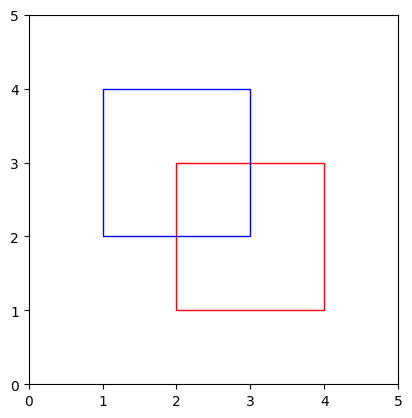

In [80]:
# JUST FOR FUN
# visualize the boxes ( NOT REQUIRED FOR THE FUNCTIONALITY )
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create a figure and axis
fig, ax = plt.subplots(1)

# Create a rectangle patch
(box1_x1, box1_y1, box1_x2, box1_y2) = box1
box1_width = box1_x2 - box1_x1
box1_height = box1_y2 - box1_y1

box1 = patches.Rectangle((box1_x1, box1_y1), box1_width, box1_height, linewidth=1, edgecolor='r', facecolor='none')

(box2_x1, box2_y1, box2_x2, box2_y2) = box2
box2_width = box2_x2 - box2_x1
box2_height = box2_y2 - box2_y1

box2 = patches.Rectangle((box2_x1, box2_y1), box2_width, box2_height, linewidth=1, edgecolor='b', facecolor='none')

# Add the patch to the axis
ax.add_patch(box1)
ax.add_patch(box2)

# Set the aspect of the plot to be equal
ax.set_aspect('equal', 'box')

# Set the x and y axis limits
plt.xlim((0, 5))
plt.ylim((0, 5))

# Show the plot
plt.show()


In [81]:
# apply non-max suppression
def yolo_non_max_suppression(scores, boxes, classes, max_boxes = 10, iou_threshold = 0.5):

    max_boxes_tensor = tf.Variable(max_boxes, dtype='int32')     # tensor to be used in tf.image.non_max_suppression()

    # Use tf.image.non_max_suppression() to get the list of indices corresponding to boxes you keep
    nms_indices = tf.image.non_max_suppression(boxes, scores, max_boxes, iou_threshold)

    # Use K.gather() to select only nms_indices from scores, boxes and classes
    scores = tf.gather(scores, nms_indices) # gather is used to select the indices values from the scores tensor
    boxes = tf.gather(boxes, nms_indices) 
    classes = tf.gather(classes, nms_indices)

    return scores, boxes, classes

In [82]:
# test the function
# we already have scores, boxes, classes
print("scores shape:", scores.shape) # represents the scores of the boxes which have score >= threshold
print("boxes shape:", boxes.shape)  # represents the boxes (4 nums for dim) which have score >= threshold
print("classes shape:", classes.shape) # represents the classes of the boxes which have score >= threshold

# cast the scores to float32
scores = tf.cast(scores, 'float32')
boxes = tf.cast(boxes, 'float32')

print("applying non-max suppression...")

scores, boxes, classes = yolo_non_max_suppression(scores, boxes, classes)

print("scores shape:", scores.shape)
print("boxes shape:", boxes.shape)
print("classes shape:", classes.shape)

scores shape: (1495,)
boxes shape: (1495, 4)
classes shape: (1495,)
applying non-max suppression...
scores shape: (10,)
boxes shape: (10, 4)
classes shape: (10,)


# THE END